In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 1. Data Loading Functions

In [4]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [5]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [6]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [7]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [8]:
char_to_num(['a','b','c'])

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3], dtype=int64)>

In [9]:
num_to_char([1, 2, 3])

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'a', b'b', b'c'], dtype=object)>

In [10]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [11]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)
    return frames, alignments

In [12]:
test_path = '.\\data\\s1\\bbal6n.mpg'

In [13]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8')

'.\\data\\s1\\bbal6n.mpg'

In [14]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [15]:
load_data(tf.convert_to_tensor(test_path))

(<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
 array([[[[ 1.4603739 ],
          [ 1.4603739 ],
          [ 1.4209043 ],
          ...,
          [ 0.15787826],
          [ 0.19734782],
          [ 0.07893913]],
 
         [[ 1.4603739 ],
          [ 1.4603739 ],
          [ 1.4209043 ],
          ...,
          [ 0.15787826],
          [ 0.07893913],
          [ 0.03946957]],
 
         [[ 1.4209043 ],
          [ 1.4209043 ],
          [ 1.3814348 ],
          ...,
          [ 0.07893913],
          [ 0.07893913],
          [ 0.07893913]],
 
         ...,
 
         [[ 0.94726956],
          [ 0.94726956],
          [ 0.94726956],
          ...,
          [ 9.94633   ],
          [ 9.867392  ],
          [ 9.867392  ]],
 
         [[ 0.94726956],
          [ 0.94726956],
          [ 0.94726956],
          ...,
          [ 9.90686   ],
          [ 9.867392  ],
          [ 9.867392  ]],
 
         [[ 0.94726956],
          [ 0.94726956],
          [ 0.94726956],
          

In [16]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [17]:
frames[0]

<tf.Tensor: shape=(46, 140, 1), dtype=float32, numpy=
array([[[1.4603739 ],
        [1.4603739 ],
        [1.4209043 ],
        ...,
        [0.15787826],
        [0.19734782],
        [0.07893913]],

       [[1.4603739 ],
        [1.4603739 ],
        [1.4209043 ],
        ...,
        [0.15787826],
        [0.07893913],
        [0.03946957]],

       [[1.4209043 ],
        [1.4209043 ],
        [1.3814348 ],
        ...,
        [0.07893913],
        [0.07893913],
        [0.07893913]],

       ...,

       [[0.94726956],
        [0.94726956],
        [0.94726956],
        ...,
        [9.94633   ],
        [9.867392  ],
        [9.867392  ]],

       [[0.94726956],
        [0.94726956],
        [0.94726956],
        ...,
        [9.90686   ],
        [9.867392  ],
        [9.867392  ]],

       [[0.94726956],
        [0.94726956],
        [0.94726956],
        ...,
        [9.90686   ],
        [9.867392  ],
        [9.867392  ]]], dtype=float32)>

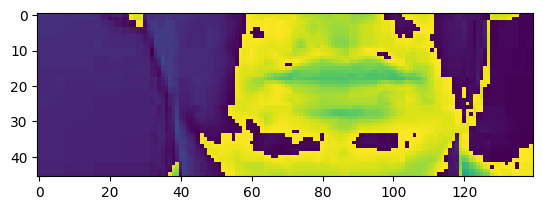

In [18]:
plt.imshow(frames[0])

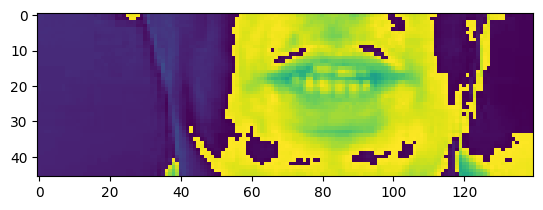

In [19]:
plt.imshow(frames[40])

In [20]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23], dtype=int64)>

In [21]:
num_to_char(alignments.numpy())

<tf.Tensor: shape=(21,), dtype=string, numpy=
array([b'b', b'i', b'n', b' ', b'b', b'l', b'u', b'e', b' ', b'a', b't',
       b' ', b'l', b' ', b's', b'i', b'x', b' ', b'n', b'o', b'w'],
      dtype=object)>

In [22]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [23]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2. Processing Data

In [24]:
from matplotlib import pyplot as plt

In [25]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
print(len(data))
################ Added for splitting data
train = data.take(450)
test = data.skip(450)

500


In [26]:
print(type(test))

<class 'tensorflow.python.data.ops.dataset_ops.SkipDataset'>


In [27]:
len(test)

50

In [28]:
test

<SkipDataset element_spec=(TensorSpec(shape=(None, 75, None, None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 40), dtype=tf.int64, name=None))>

In [29]:
frames, alignments = data.as_numpy_iterator().next()

In [30]:
len(frames)

2

In [31]:
sample = data.as_numpy_iterator()

In [32]:
val = sample.next(); val[0]

array([[[[[ 1.4313179 ],
          [ 1.4313179 ],
          [ 1.4313179 ],
          ...,
          [ 0.        ],
          [10.734884  ],
          [10.734884  ]],

         [[ 1.4313179 ],
          [ 1.4313179 ],
          [ 1.4313179 ],
          ...,
          [ 0.        ],
          [10.734884  ],
          [10.734884  ]],

         [[ 1.4313179 ],
          [ 1.4313179 ],
          [ 1.4313179 ],
          ...,
          [ 0.        ],
          [ 0.        ],
          [ 0.        ]],

         ...,

         [[ 1.010342  ],
          [ 1.010342  ],
          [ 1.010342  ],
          ...,
          [10.524396  ],
          [10.524396  ],
          [10.524396  ]],

         [[ 1.010342  ],
          [ 1.010342  ],
          [ 1.010342  ],
          ...,
          [10.482299  ],
          [10.482299  ],
          [10.482299  ]],

         [[ 1.010342  ],
          [ 1.010342  ],
          [ 1.010342  ],
          ...,
          [10.482299  ],
          [10.482299  ],
          

In [33]:
imageio.mimsave('./animation.gif', val[0][0], fps=10)

Lossy conversion from float32 to uint8. Range [0.0, 10.734884262084961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.734884262084961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.734884262084961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.734884262084961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.734884262084961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.734884262084961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 10.734884262084961]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to u

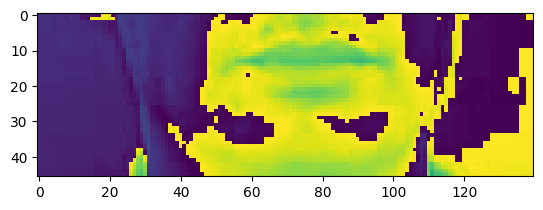

In [34]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][0])

In [35]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'place blue by i eight now'>

# 3. Design the Deep Neural Network

In [36]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [37]:
data.as_numpy_iterator().next()[0][1].shape

(75, 46, 140, 1)

In [38]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu')) # Give non linearity to our network
model.add(MaxPool3D((1,2,2))) # Take max value from each of our frames, and condense it to 2x2 shape

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten())) # Allow us to have 75 inputs to LSTM -NN and that output 75 characters

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True))) 
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))
# Talking 41 units which is 40+1 for the special token

In [39]:
char_to_num.vocab_size()

40

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [41]:
5*17*75
# 128 x 2 = 256 (Since Bidirectional)

6375

In [42]:
yhat = model.predict(val[0])

1/1 [==============================] - 4s 4s/step


In [43]:
yhat.shape

(2, 75, 41)

In [44]:
tf.argmax(yhat[0], axis=1)

<tf.Tensor: shape=(75,), dtype=int64, numpy=
array([31, 12, 12, 12, 12, 12, 12, 12, 12, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 27, 27, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 38, 38, 38, 38, 38, 38], dtype=int64)>

In [45]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b"2llllllll99999999999999999999999999999999''99999999999999999999999999999999">

In [46]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b"2llllllll99999999999999999999999999999999''99999999999999999999999999999999">

In [47]:
model.input_shape

(None, 75, 46, 140, 1)

In [48]:
model.output_shape

(None, 75, 41)

# 4. Model Training

In [49]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [50]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [51]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [52]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [53]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 

In [54]:
schedule_callback = LearningRateScheduler(scheduler)

In [55]:
example_callback = ProduceExample(test)

In [49]:
model.fit(train, validation_data=test, epochs=10, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/10
1/1 [==============================] - 3s 3s/steps - loss: 85.670
Original: bin green in n one soon
Prediction: le e e e n o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay green at m one again
Prediction: le e e e n o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 12847s 29s/step - loss: 85.6703 - val_loss: 68.8849 - lr: 1.0000e-04
Epoch 2/10
1/1 [==============================] - 2s 2s/steps - loss: 71.719
Original: lay green at f four now
Prediction: la e e e e n
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: set red in h one soon
Prediction: la e e e e o
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 [==============================] - 12764s 28s/step - loss: 71.7198 - val_loss: 66.2372 

# 5. Predicting the model

In [58]:
model.load_weights('models_25_e/checkpoint')

In [59]:
test_data = test.as_numpy_iterator()

In [60]:
sample = test_data.next()

In [61]:
sample

(array([[[[[ 1.5692966 ],
           [ 1.5692966 ],
           [ 1.5300642 ],
           ...,
           [ 0.03923241],
           [ 0.03923241],
           [ 0.03923241]],
 
          [[ 1.5692966 ],
           [ 1.5692966 ],
           [ 1.5300642 ],
           ...,
           [ 0.03923241],
           [ 0.03923241],
           [ 0.03923241]],
 
          [[ 1.412367  ],
           [ 1.412367  ],
           [ 1.412367  ],
           ...,
           [ 0.07846483],
           [ 0.07846483],
           [ 0.07846483]],
 
          ...,
 
          [[ 0.9808104 ],
           [ 0.9808104 ],
           [ 0.9808104 ],
           ...,
           [ 9.847337  ],
           [ 9.847337  ],
           [ 9.847337  ]],
 
          [[ 0.9808104 ],
           [ 0.9808104 ],
           [ 0.9808104 ],
           ...,
           [ 9.847337  ],
           [ 9.847337  ],
           [ 9.847337  ]],
 
          [[ 0.9808104 ],
           [ 0.9808104 ],
           [ 0.9808104 ],
           ...,
           [ 9

In [62]:
yhat = model.predict(sample[0])

1/1 [==============================] - 4s 4s/step


In [63]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin white with h three soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'set green at v seven again'>]

In [64]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [65]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin white with three soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'set green at seven again'>]

# 6. Testing on a Video

In [66]:
# sample = load_data(tf.convert_to_tensor('.\\data\\s1\\bras9a.mpg'))
sample = load_data(tf.convert_to_tensor('.\\data\\s1\\bbaf3s.mpg'))

In [67]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at f three soon'>]

In [68]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 1s 961ms/step


In [69]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [70]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at three soon'>]

# Evaluation Metrics

In [71]:
real_text = 'bin blue at f three soon'
predicted_text = 'bin blue at t ree soon'


## 1. Word Error Rate

In [75]:
def wer(reference, hypothesis):
    reference_words = reference.split()
    hypothesis_words = hypothesis.split()
    
    dp = [[0] * (len(hypothesis_words) + 1) for _ in range(len(reference_words) + 1)]
    
    for i in range(len(reference_words) + 1):
        dp[i][0] = i
        
    for j in range(len(hypothesis_words) + 1):
        dp[0][j] = j
    
    for i in range(1, len(reference_words) + 1):
        for j in range(1, len(hypothesis_words) + 1):
            if reference_words[i - 1] == hypothesis_words[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(dp[i - 1][j - 1], dp[i - 1][j], dp[i][j - 1]) + 1
                
    wer = dp[len(reference_words)][len(hypothesis_words)] / len(reference_words)
    return wer
print("Word Error Rate : ",wer(real_text, predicted_text))

Word Error Rate :  0.3333333333333333


## 2. Character Error Rate

In [76]:
def cer(reference, hypothesis):
    reference_chars = list(reference)
    hypothesis_chars = list(hypothesis)
    
    dp = [[0] * (len(hypothesis_chars) + 1) for _ in range(len(reference_chars) + 1)]
    
    for i in range(len(reference_chars) + 1):
        dp[i][0] = i
        
    for j in range(len(hypothesis_chars) + 1):
        dp[0][j] = j
    
    for i in range(1, len(reference_chars) + 1):
        for j in range(1, len(hypothesis_chars) + 1):
            if reference_chars[i - 1] == hypothesis_chars[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(dp[i - 1][j - 1], dp[i - 1][j], dp[i][j - 1]) + 1
                
    cer = dp[len(reference_chars)][len(hypothesis_chars)] / len(reference_chars)
    return cer
print("Character Error Rate : ",cer(real_text, predicted_text))

Character Error Rate :  0.125
